<a href="https://colab.research.google.com/github/LH-VOID/LE1_Hombre_M.ipynb/blob/main/LE1_Hombre_M.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from google.colab import drive
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

drive.mount('/content/drive')
dataset = pd.read_excel('/content/drive/MyDrive/dataset/AirQualityUCI.xlsx')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   float64       
 4   NMHC(GT)       9357 non-null   int64         
 5   C6H6(GT)       9357 non-null   float64       
 6   PT08.S2(NMHC)  9357 non-null   float64       
 7   NOx(GT)        9357 non-null   float64       
 8   PT08.S3(NOx)   9357 non-null   float64       
 9   NO2(GT)        9357 non-null   float64       
 10  PT08.S4(NO2)   9357 non-null   float64       
 11  PT08.S5(O3)    9357 non-null   float64       
 12  T              9357 non-null   float64       
 13  RH             9357 non-null   float64       
 14  AH             9357 non-null   float64       
dtypes: datetime64[ns](1),

In [ ]:
dataset.describe()

,Date,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,2004-09-21 04:30:05.193972480,-34.207524,1048.869652,-159.090093,1.865576,894.475963,168.604200,794.872333,58.135898,1391.363266,974.951534,9.776600,39.483611,-6.837604
min,2004-03-10 00:00:00,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,2004-06-16 00:00:00,0.600000,921.000000,-200.000000,4.004958,711.000000,50.000000,637.000000,53.000000,1184.750000,699.750000,10.950000,34.050000,0.692275
50%,2004-09-21 00:00:00,1.500000,1052.500000,-200.000000,7.886653,894.500000,141.000000,794.250000,96.000000,1445.500000,942.000000,17.200000,48.550000,0.976823
75%,2004-12-28 00:00:00,2.600000,1221.250000,-200.000000,13.636091,1104.750000,284.200000,960.250000,133.000000,1662.000000,1255.250000,24.075000,61.875000,1.296223
max,2005-04-04 00:00:00,11.900000,2039.750000,1189.000000,63.741476,2214.000000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,44.600000,88.725000,2.231036
std,NaN,77.657170,329.817015,139.789093,41.380154,342.315902,257.424561,321.977031,126.931428,467.192382,456.922728,43.203438,51.215645,38.976670


In [ ]:
dataset.shape

(9357, 15)

In [ ]:
dataset.isnull().sum() #data cleaning

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [ ]:
dataset_cleaned = dataset.dropna()

In [ ]:
dataset_cleaned.duplicated().sum()

0

In [ ]:
dataset_cleaned = dataset_cleaned.drop_duplicates()
dataset_cleaned = dataset_cleaned.drop(columns=['Time'])

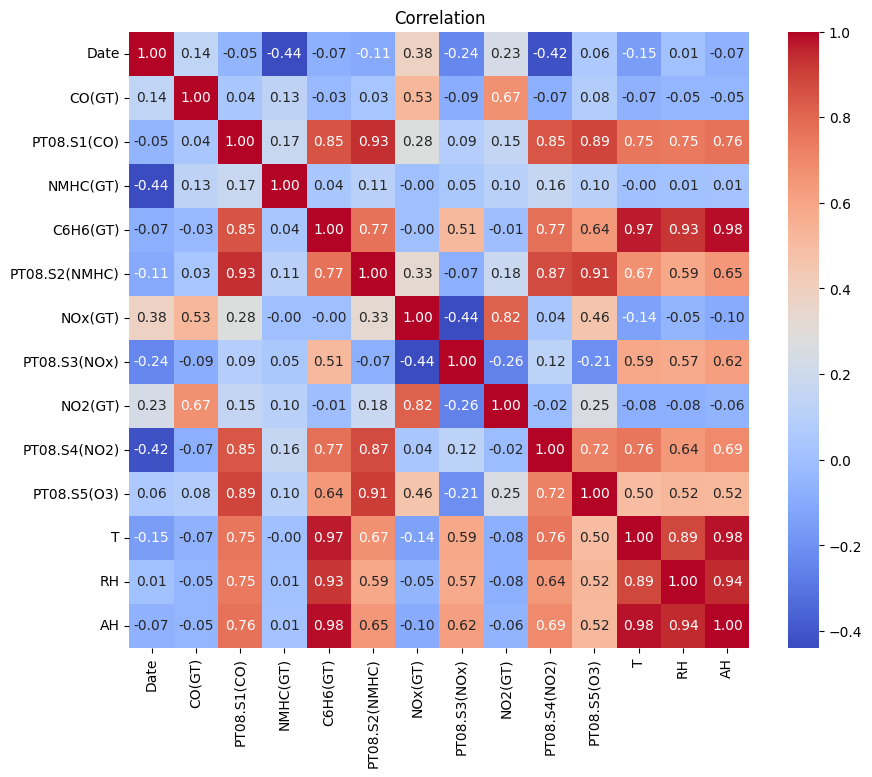

In [ ]:
correlationmatrix_ = dataset_cleaned.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlationmatrix_, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation')
plt.show()

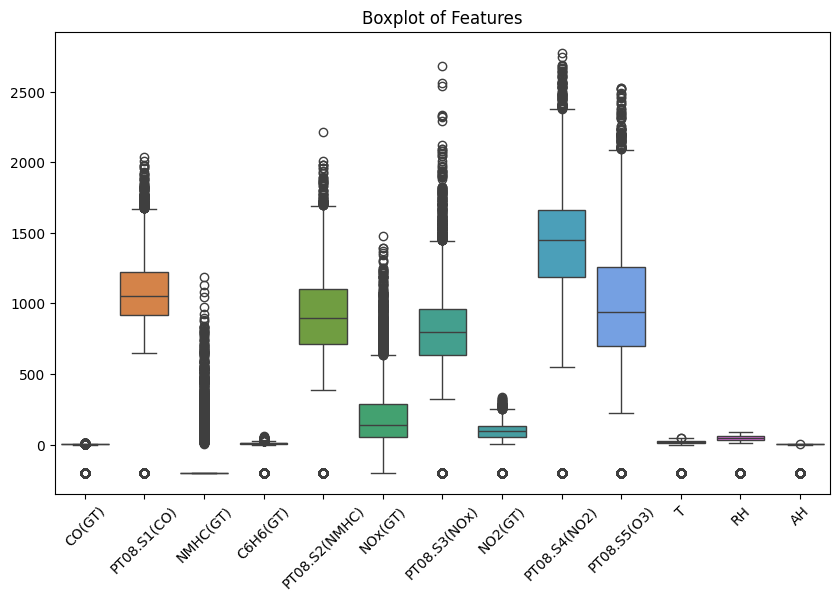

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=dataset_cleaned)
plt.title('Boxplot of Features')
plt.xticks(rotation=45)
plt.show()

In [ ]:
dataset_cleaned['Date'] = pd.to_datetime(dataset_cleaned['Date']).astype(np.int64)

In [ ]:
X = dataset_cleaned.drop(columns=['NO2(GT)', 'Date'])
y = dataset_cleaned['NO2(GT)']
selector = SelectKBest(score_func=f_regression, k=5)  # Feature Selection
X_selected = selector.fit_transform(X, y)
selected_indices = selector.get_support(indices=True)
selected_features = X.columns[selected_indices]
print("Selected Features:", selected_features)

Selected Features: Index(['CO(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'PT08.S5(O3)'], dtype='object')


In [ ]:
scaler = StandardScaler()    # Multicollinearity
X_scaled = scaler.fit_transform(X)
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
print("\nVariance-Inflation-Factor")
print(vif_data)


Variance-Inflation-Factor
          Feature          VIF
0            Date     6.134444
1          CO(GT)     1.635614
2     PT08.S1(CO)    21.975598
3        NMHC(GT)     1.774169
4        C6H6(GT)  1683.113372
5   PT08.S2(NMHC)   118.970601
6         NOx(GT)     3.089075
7    PT08.S3(NOx)    12.079158
8    PT08.S4(NO2)    37.765371
9     PT08.S5(O3)    11.532184
10              T   213.058424
11             RH    44.036876
12             AH  1810.420340


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Split dataset

In [ ]:
dataset_cleaned.head()

,Date,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,1078876800000000000,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,1078876800000000000,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,1078876800000000000,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,1078876800000000000,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,1078876800000000000,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("R-squared:", r2)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

R-squared: 0.8028347297779834
Mean Absolute Error: 39.50360270880045
Mean Squared Error: 3039.227387870404
Root Mean Squared Error: 55.12918816625549


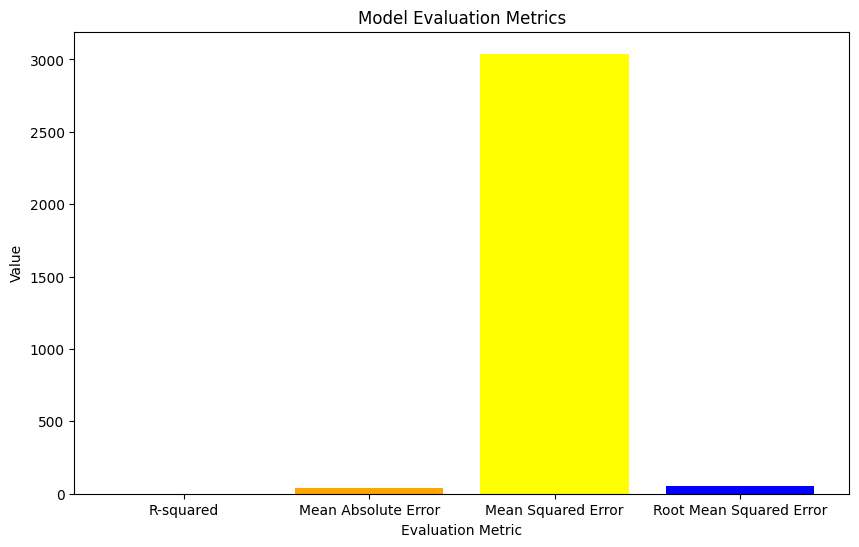

In [ ]:
evaluation_metrics = {'R-squared': r2, 'Mean Absolute Error': mae, 'Mean Squared Error': mse, 'Root Mean Squared Error': rmse}
plt.figure(figsize=(10, 6))
plt.bar(evaluation_metrics.keys(), evaluation_metrics.values(), color=['red', 'orange', 'yellow', 'blue'])
plt.xlabel("Evaluation Metric")
plt.ylabel("Value")
plt.title("Model Evaluation Metrics")
plt.show()


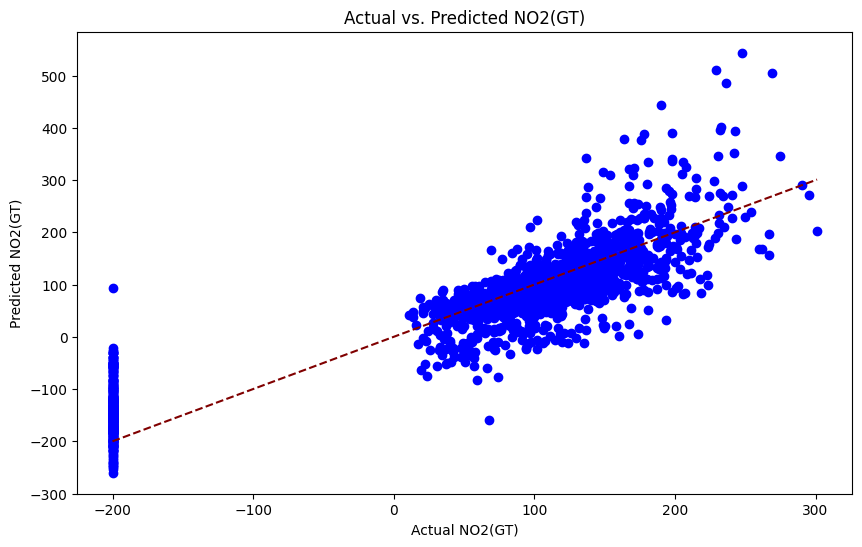

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='maroon')
plt.xlabel("Actual NO2(GT)")
plt.ylabel("Predicted NO2(GT)")
plt.title("Actual vs. Predicted NO2(GT)")
plt.show()